In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

In [2]:
np.random.seed(42)

# 1. Import the train datasets

In [3]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [4]:
Model_1 = KNeighborsRegressor()

# 2. Setup Pipeline

In [5]:
pca=PCA()
RG = Model_1

In [6]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("RG",RG)])

In [7]:
param_grid = {
    "pca__n_components": [5, 10, 30, 45, 60, 100 ,150 ,170],
    "RG__n_neighbors":[1,4,5,6,7,8,10]
    
}

# 3. Setup GridSearch

In [8]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [9]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('RG', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'RG__n_neighbors': [1, 4, 5, 6, 7, 8, 10],
                         'pca__n_components': [5, 10, 30, 45, 60, 100, 150,
                                               170]},
             scoring='neg_mean_squared_error')

In [10]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.797):
{'RG__n_neighbors': 6, 'pca__n_components': 10}


In [11]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__n_neighbors,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
25,0.224300,0.031616,0.049568,0.042223,6,10,"{'RG__n_neighbors': 6, 'pca__n_components': 10}",-0.754742,-0.749098,-0.891062,-0.906942,-0.934988,-0.804584,-0.719602,-0.628146,-0.826844,-0.758663,-0.797467,0.089985,1
9,0.245406,0.010152,0.031655,0.030039,4,10,"{'RG__n_neighbors': 4, 'pca__n_components': 10}",-0.740981,-0.724108,-0.922776,-0.910729,-0.997085,-0.878213,-0.726011,-0.615900,-0.810911,-0.684008,-0.801072,0.115960,2
17,0.247780,0.054412,0.040308,0.048891,5,10,"{'RG__n_neighbors': 5, 'pca__n_components': 10}",-0.769880,-0.731497,-0.902152,-0.913479,-0.994984,-0.827461,-0.678591,-0.651271,-0.819439,-0.733317,-0.802207,0.104557,3
33,0.156884,0.059726,0.045921,0.043335,7,10,"{'RG__n_neighbors': 7, 'pca__n_components': 10}",-0.785794,-0.746170,-0.887472,-0.925264,-0.990983,-0.814789,-0.715547,-0.645289,-0.845237,-0.753889,-0.811043,0.098568,4
41,0.072723,0.030018,0.017790,0.020906,8,10,"{'RG__n_neighbors': 8, 'pca__n_components': 10}",-0.774776,-0.746200,-0.897629,-0.911492,-0.947607,-0.799256,-0.765582,-0.663619,-0.858247,-0.766560,-0.813097,0.083583,5
16,0.277513,0.031766,0.026953,0.031606,5,5,"{'RG__n_neighbors': 5, 'pca__n_components': 5}",-0.801608,-0.735435,-0.955114,-0.933711,-0.999747,-0.821955,-0.722580,-0.672002,-0.842773,-0.746823,-0.823175,0.103997,6
32,0.203978,0.055479,0.028416,0.031083,7,5,"{'RG__n_neighbors': 7, 'pca__n_components': 5}",-0.809725,-0.733602,-0.981819,-0.955402,-1.000021,-0.794172,-0.730297,-0.669907,-0.838365,-0.757944,-0.827125,0.109279,7
24,0.239958,0.034921,0.048870,0.044736,6,5,"{'RG__n_neighbors': 6, 'pca__n_components': 5}",-0.808199,-0.803153,-0.988891,-0.949346,-0.986691,-0.804021,-0.698594,-0.683720,-0.816311,-0.783314,-0.832224,0.103391,8
49,0.064839,0.027521,0.022266,0.026302,10,10,"{'RG__n_neighbors': 10, 'pca__n_components': 10}",-0.777766,-0.731083,-0.919350,-0.944594,-1.046697,-0.816959,-0.761532,-0.681158,-0.855768,-0.799119,-0.833402,0.104451,9
40,0.044371,0.018957,0.015187,0.022984,8,5,"{'RG__n_neighbors': 8, 'pca__n_components': 5}",-0.806915,-0.750623,-0.944604,-0.966844,-0.988583,-0.802278,-0.729559,-0.674261,-0.897386,-0.778459,-0.833951,0.102954,10


# 4. Best Hyperparameter

In [12]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__n_neighbors': 6, 'pca__n_components': 10}


# 5. Evaluate Model $log(Sales)$

In [13]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_n = parms.iloc[0][0]['RG__n_neighbors']

In [14]:
Model_2 = KNeighborsRegressor(n_neighbors=best_n)

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [16]:
pca1 = PCA(n_components=best_pca)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
RG1 = Model_2
RG1.fit(PX_train1,Y_train1)

KNeighborsRegressor(n_neighbors=6)

In [17]:
pca2 = PCA(n_components=best_pca)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [18]:
MSE(RG1.predict(PX_test1),Y_test1)

1.9305373060002655

In [19]:
result = pd.DataFrame(np.exp(Y_test1))

In [20]:
result["Predicted_sales"] = np.exp(RG1.predict(PX_test1))

In [21]:
MSE(result["sales"],result["Predicted_sales"])

1097.0677237955551

# 5.1 Model using original sales data

In [22]:
Model_3 = KNeighborsRegressor(n_neighbors=best_n)

In [23]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [24]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [25]:
pca3 = PCA(n_components=best_pca)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
RG2 = Model_3
RG2.fit(PX_train2,Y_train2)

KNeighborsRegressor(n_neighbors=6)

In [26]:
pca4 = PCA(n_components=best_pca)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [27]:
MSE(RG2.predict(PX_test2),Y_test2)

1092.3331533477321

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [28]:
residual = result['sales']-result['Predicted_sales']

In [29]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [30]:
import scipy.stats as sct

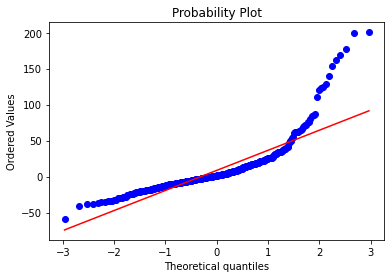

In [31]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [32]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

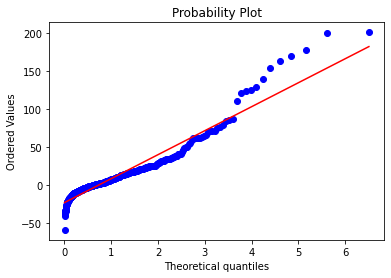

In [33]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [34]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

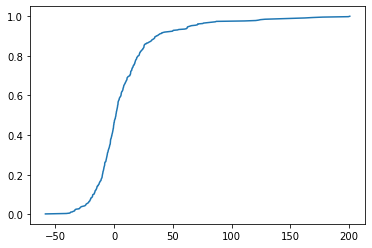

In [35]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

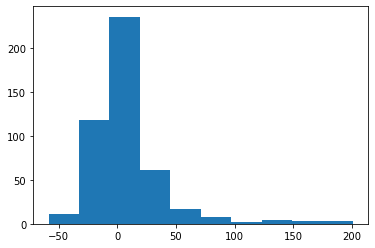

In [36]:
plt.hist(Sample)
plt.show()

In [37]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [38]:
offset = inv(Sample,jumps,2/3)
offset

9.73627552295237

In [39]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [40]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [41]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [54]:
#Profit (None)
profit_lst = profit(round(result['sales']),round(result['Predicted_sales']))
profit_lst.sum()

21372.0

In [42]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

25356.0

In [43]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

22028.0

In [44]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

26000.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [45]:
Model_4=KNeighborsRegressor(n_neighbors=best_n)

In [49]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca,random_state=42)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    RG_K = Model_4
    RG_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca,random_state=42)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(np.exp(RG_K.predict(PX_test_K)),np.exp(Y_test_K)))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(RG_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual_K.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size_K+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [50]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.347091,0.380325,0.154398,0.167639,0.131426,0.357611,0.218020,0.255681,0.302165,0.282559,0.259692
Exponential,0.329789,0.326763,0.160187,0.205322,0.202337,0.343577,0.214589,0.182220,0.256174,0.276028,0.249699
Empirical,0.357819,0.386954,0.207102,0.249356,0.247542,0.372260,0.276670,0.257589,0.323819,0.306569,0.298568


In [51]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,14364.0,17212.0,7148.0,7812.0,6524.0,13964.0,10676.0,11792.0,13508.0,11768.0,11476.8,3302.503681
Exponential,13648.0,14788.0,7416.0,9568.0,10044.0,13416.0,10508.0,8404.0,11452.0,11496.0,11074.0,2244.646075
Empirical,14808.0,17512.0,9588.0,11620.0,12288.0,14536.0,13548.0,11880.0,14476.0,12768.0,13302.4,2071.522107
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [52]:
mse_table = pd.DataFrame(mse_lst,index=col_name,columns=['Cross Validation MSE'])
mse_table

,Cross Validation MSE
Dataset_1,879.239423
Dataset_2,1118.853635
Dataset_3,2339.181530
Dataset_4,3023.598116
Dataset_5,4351.890430
Dataset_6,845.879498
Dataset_7,2659.617468
Dataset_8,1492.551197
Dataset_9,1670.431337
Dataset_10,1212.663286


In [53]:
print(f"Average 10 fold CV MSE:  {float(mse_table.mean())}")

Average 10 fold CV MSE:  1959.390591997167


In [ ]:
profit_table.to_csv(".\\Model_Selection_Result\\3.1A_KNN.csv")

In [55]:
name = "3.1A_KNN.csv"
mse_table.to_csv(f".\\Model_CV_Result_MSE\\{name}")

In [56]:
f = pd.DataFrame(fraction_table['mean_fraction'])
f = f.transpose().reset_index()
f.to_csv(f".\\Model_CV_Result_Efficiency\\{name}")